<a href="https://colab.research.google.com/github/naufalihsan/tesseract/blob/master/Text_Predicting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import files

uploaded = files.upload()

Saving train.csv to train.csv


## Read Dataset

In [0]:
df = pd.read_csv('train.csv')

In [5]:
df.head()

,Unnamed: 0,entity,category
0,0,Mutia Maryati,name
1,1,Padmi Susanti M.Farm,name
2,2,Karen Ayu Nuraini,name
3,3,Bagus Pangestu S.E.,name
4,4,Violet Halimah,name


## Text Cleaning

- remove punctuation
- make lowercase

In [0]:
train = df.copy()
train['entity']= train['entity'].astype(str)
train['entity'] = train['entity'].str.replace('[^\w\s]',' ').str.lower()

In [7]:
train.head()

,Unnamed: 0,entity,category
0,0,mutia maryati,name
1,1,padmi susanti m farm,name
2,2,karen ayu nuraini,name
3,3,bagus pangestu s e,name
4,4,violet halimah,name


## Building model

- build model to classify entity to its category

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train['entity'])

In [0]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)

In [0]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [0]:
from sklearn.preprocessing import LabelEncoder

# creating mapping from unique label texts to unique integers
# note this can be re-used to encode and decode the labels after as well

encoder = LabelEncoder()
target = encoder.fit_transform(train['category'])

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, target, test_size = 0.15, random_state = 21)

In [25]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(
        n_estimators = 100, learning_rate = learning_rate,
        max_depth = 2, random_state = 21)
    gb.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.842
Accuracy score (validation): 0.837
Learning rate:  0.1
Accuracy score (training): 0.919
Accuracy score (validation): 0.861
Learning rate:  0.25
Accuracy score (training): 0.970
Accuracy score (validation): 0.891
Learning rate:  0.5
Accuracy score (training): 0.998
Accuracy score (validation): 0.929
Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.918
Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.918


In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.5,
    max_depth=2,
    random_state=21).fit(X_train, y_train)

In [27]:
datas = ['Naufal Ihsan Pratama',
         'Jakarta  21 01 1989',
         'Jalan Patal Senayan GG BB No 25',
         '3217061804870007']
X_new_counts = count_vect.transform(datas)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

cheatsheet = dict(zip(encoder.transform(encoder.classes_), encoder.classes_))
predicted = clf.predict(X_new_tfidf)

print('Evaluation Test')

for doc, category in zip(datas, predicted):
    print('Entity : {} => Predict type : {}'.format(doc, cheatsheet[category]))

Evaluation Test
Entity : Naufal Ihsan Pratama => Predict type : name
Entity : Jakarta  21 01 1989 => Predict type : ttl
Entity : Jalan Patal Senayan GG BB No 25 => Predict type : address
Entity : 3217061804870007 => Predict type : card


Text(0.5, 1.0, 'Confusion Matrix')

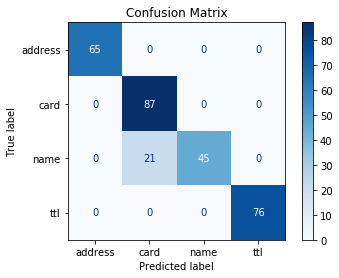

In [33]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib as plt

disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels= encoder.classes_,
                                 cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix')